In [ ]:
# 데이콘 교육용 유튜브 강의및 코드 설명을 필사 

## EDA

In [1]:
import pandas as pd
import lightgbm as lgb

In [2]:
train = pd.read_csv("C:/Users/inha/Desktop/데이콘/movies/movies_train.csv")
test = pd.read_csv("C:/Users/inha/Desktop/데이콘/movies/movies_test.csv")
submission = pd.read_csv("C:/Users/inha/Desktop/데이콘/movies/submission.csv")

In [27]:
train.head()  

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [26]:
train.shape

(600, 12)

In [5]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [6]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [8]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [20]:
train[['genre','box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6.627000e+03
다큐멘터리,6.717226e+04
서스펜스,8.261100e+04
애니메이션,1.819267e+05
멜로/로맨스,4.259680e+05
미스터리,5.275482e+05
공포,5.908325e+05
드라마,6.256898e+05
코미디,1.193914e+06


In [21]:
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


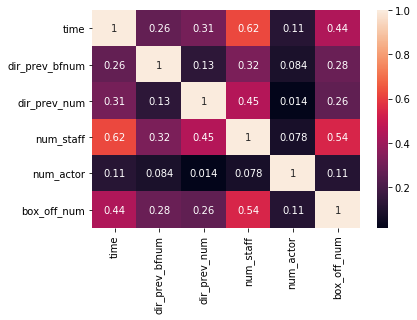

In [23]:
import seaborn as sns
sns.heatmap(train.corr(),annot=True)

## 전처리

In [3]:
train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [30]:
train[train['dir_prev_bfnum'].isnull()]['dir_prev_num'].sum()

0

In [6]:
train['dir_prev_bfnum'].fillna(0,inplace=True)

In [32]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [7]:
test['dir_prev_bfnum'].fillna(0,inplace=True)

## 모델링 

In [9]:
model=lgb.LGBMRegressor(random_stata=0,n_estimators=1000)

In [10]:
features=['time','dir_prev_num','num_staff','num_actor']
target=['box_off_num']

In [11]:
x_train,x_test,y_train=train[features],test[features],train[target]

## 모델 학습 및 검증
- 베이스모델
- 교차검증(Ex k-fold)
- featrue engineering
- grid search (hyperparameter tuning)

In [13]:
model.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_stata=0, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [14]:
singleLGBM=submission.copy()

In [16]:
singleLGBM['box_off_num']=model.predict(x_test)

In [17]:
singleLGBM.head()  #영화관객수는 음수일 수 없는데 음수 나온거 보니 벌써 별로인 모델 

,title,box_off_num
0,용서는 없다,2.817995e+06
1,아빠가 여자를 좋아해,3.753772e+05
2,하모니,-5.693243e+05
3,의형제,1.581189e+06
4,평행 이론,-5.277806e+05


In [19]:
from sklearn.model_selection import KFold  #시계열 자료일 경우는 kfold 하지않을 수 있음

In [21]:
k_fold=KFold(n_splits=5,shuffle=True,random_state=0)

In [22]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [23]:
x_train

,time,dir_prev_num,num_staff,num_actor
0,96,0,91,2
1,130,2,387,3
2,123,4,343,4
3,101,2,20,6
4,108,1,251,2
...,...,...,...,...
595,111,1,510,7
596,127,1,286,6
597,99,0,123,4
598,102,0,431,4


In [25]:
model=lgb.LGBMRegressor(random_state=0,n_estimators=1000)

models=[]

for train_idx,val_idx in k_fold.split(x_train):
    x_t=x_train.iloc[train_idx]
    y_t=y_train.iloc[train_idx]

    x_val=x_train.iloc[val_idx]
    y_val=y_train.iloc[val_idx]
    
    models.append(model.fit(x_t,y_t,eval_set=(x_val,y_val),early_stopping_rounds=100,verbose=100))

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 1.99956e+12
Early stopping, best iteration is:
[14]	valid_0's l2: 1.82271e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 3.36371e+12
Early stopping, best iteration is:
[44]	valid_0's l2: 3.19684e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 1.60852e+12
Early stopping, best iteration is:
[13]	valid_0's l2: 1.27294e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 3.00841e+12
Early stopping, best iteration is:
[19]	valid_0's l2: 2.8533e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 2.55452e+12
Early stopping, best iteration is:
[6]	valid_0's l2: 1.95655e+12


In [26]:
models

[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
      

In [28]:
preds=[]


for model in models:
    preds.append(model.predict(x_test))


In [29]:
len(preds)

5

In [30]:
kfoldLIghtGBM=submission.copy()

In [32]:
import numpy as np

preds

[array([2712007.19484002,  917409.88709261,  947612.83357605,
        1336100.8757303 , 1031528.31102813,  449494.40467634,
         398991.99071801,  442004.37938619,  408896.53182219,
         923498.18422758,  563057.64143004, 1336100.8757303 ,
         707629.24957984,  442004.37938619,  707629.24957984,
        1336100.8757303 ,  394948.92299263, 1336100.8757303 ,
         528315.96141741,  387440.64281398,  400570.05859567,
         396102.03471065,  681519.84908466,  423623.57454117,
         444323.77545573,  868508.2357173 ,  469837.11174793,
         923498.18422758,  588586.49760254,  427484.47590382,
        1336100.8757303 ,  430970.90427521,  444648.57224469,
         830494.18742187,  392515.90795562,  563057.64143004,
         403428.42919271,  400570.05859567,  410157.45269192,
         392515.90795562,  424970.28997457,  444323.77545573,
         444648.57224469,  681519.84908466,  681519.84908466,
        1031528.31102813,  428440.91325284,  528315.96141741,
        

In [57]:
kfoldLIghtGBM['box_off_num']=np.mean(preds,axis=0)

In [58]:
kfoldLIghtGBM

,title,box_off_num
0,용서는 없다,2.231805e+06
1,아빠가 여자를 좋아해,8.475467e+05
2,하모니,9.560948e+05
3,의형제,1.248478e+06
4,평행 이론,9.919215e+05
...,...,...
238,해에게서 소년에게,4.319606e+05
239,울보 권투부,4.318345e+05
240,어떤살인,5.564111e+05
241,말하지 못한 비밀,5.222943e+05


In [41]:
features  #genre 와 dir_prev_bfnum 추가 

['time', 'dir_prev_num', 'num_staff', 'num_actor']

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  600 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [43]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()
train['genre']=le.fit_transform(train['genre'])

In [44]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,10,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,2,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,10,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,11,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,11,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,4,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,4,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,1,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,2,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [45]:
test['genre']=le.transform(test['genre'])

In [46]:
features=['time', 'dir_prev_num', 'num_staff', 'num_actor','dir_prev_bfnum','genre']

In [47]:
x_train,x_test,y_train=train[features],test[features],train[target]

In [48]:
model=lgb.LGBMRegressor(random_state=0,n_estimators=1000)

models=[]

for train_idx,val_idx in k_fold.split(x_train):
    x_t=x_train.iloc[train_idx]
    y_t=y_train.iloc[train_idx]

    x_val=x_train.iloc[val_idx]
    y_val=y_train.iloc[val_idx]
    
    models.append(model.fit(x_t,y_t,eval_set=(x_val,y_val),early_stopping_rounds=100,verbose=100))

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 1.83412e+12
Early stopping, best iteration is:
[15]	valid_0's l2: 1.71878e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 3.45188e+12
Early stopping, best iteration is:
[34]	valid_0's l2: 3.30873e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 1.3865e+12
Early stopping, best iteration is:
[28]	valid_0's l2: 1.18138e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 2.86779e+12
Early stopping, best iteration is:
[28]	valid_0's l2: 2.81054e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 2.88036e+12
Early stopping, best iteration is:
[5]	valid_0's l2: 2.02763e+12


In [49]:
preds=[]


for model in models:
    preds.append(model.predict(x_test))


In [52]:
feLightGBM=submission.copy()

In [53]:
feLightGBM['box_off_num']=np.mean(preds,axis=0)

In [59]:
from sklearn.model_selection import GridSearchCV

In [62]:
model=lgb.LGBMRegressor(random_state=0,n_estimators=1000)


params={
    'lr':[0.1,0.01,0.003],
    'min_child_samples':[20,30]
}

gs=GridSearchCV(estimator=model,
                param_grid=params,
                scoring='neg_mean_squared_error',
                cv=k_fold
               
               
               )

In [63]:
gs.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=1000, n_jobs=-1,
                                     num_leaves=31, objective=None,
                                     random_state=0, reg_alpha=0.0,
                                     reg_lambda=0.0, silent=True, subsample=1.0,
                                     subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'lr': [0.1, 0.01, 0.003],
                         'min_child

In [65]:
gs.best_params_

{'lr': 0.1, 'min_child_samples': 30}

In [66]:
model=lgb.LGBMRegressor(random_state=0,n_estimators=1000, learning_rate=0.1,min_child_samples= 30)

models=[]

for train_idx,val_idx in k_fold.split(x_train):
    x_t=x_train.iloc[train_idx]
    y_t=y_train.iloc[train_idx]

    x_val=x_train.iloc[val_idx]
    y_val=y_train.iloc[val_idx]
    
    models.append(model.fit(x_t,y_t,eval_set=(x_val,y_val),early_stopping_rounds=100,verbose=100))

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 1.7326e+12
Early stopping, best iteration is:
[51]	valid_0's l2: 1.67363e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 3.4499e+12
Early stopping, best iteration is:
[21]	valid_0's l2: 3.33392e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 1.3052e+12
Early stopping, best iteration is:
[15]	valid_0's l2: 1.2007e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 2.752e+12
Early stopping, best iteration is:
[38]	valid_0's l2: 2.62517e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 2.68145e+12
Early stopping, best iteration is:
[9]	valid_0's l2: 1.94653e+12


In [67]:
preds=[]


for model in models:
    preds.append(model.predict(x_test))


In [68]:
gslgbm=submission.copy()

In [69]:
gslgbm['box_off_num']=np.mean(preds,axis=0)

In [70]:
gslgbm

,title,box_off_num
0,용서는 없다,2.854505e+06
1,아빠가 여자를 좋아해,8.266440e+05
2,하모니,1.275246e+06
3,의형제,1.302033e+06
4,평행 이론,9.143670e+05
...,...,...
238,해에게서 소년에게,2.969327e+05
239,울보 권투부,2.816115e+05
240,어떤살인,5.396737e+05
241,말하지 못한 비밀,4.196977e+05


In [71]:
gslgbm.to_csv('gslgbm.csv',index=False)